# Project: Investigate TMDb Movie Dataset
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
<ul>
    <li>In this project I will be analyzing data associated with the TMDb movie data set which contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
    <li>In particular, I will be interested in finding the top rated movies in different aspects according to data provided from dfferent columns.
</ul>

### Questions answered in this course: 
<ol>
    <li>What is the relation between the budget and profit?
    <li>Which year has the highest/lowest movie release?
</ol>

In [1]:
# Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the tmdb-movies data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# Loading data.
df = pd.read_csv('tmdb-movies.csv')

# Printing out one line.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Observation
>There are too many columns to remove because I don't need them to answer questions.

In [3]:
# Performing operations to inspect data types and look
# for instances of missing or possibly errant data.

# Getting the dimensions of the array, number of rows and columns.
df.shape

(10866, 21)

### Observation
>The tmdb-movies dataset consists of 10866 rows and 21 columns.

In [4]:
# df Summary descriptive statistics for each column.
df.describe() 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Observation
>The budget and revenue columns contain some missing values, which should be dropped.

In [5]:
# Basic data information(columns, rows, data types and memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Observation
><ul>
    <li>Some columns have null values.
    <li>The releasae_year column data type is int64 which needs to be converted to datetime pandas.
 </ul>

## Cleaning steps
>After discussing the structure of the data and any problems that need to be
cleaned, I will perform some cleaning steps in the following part of this section.

In [6]:
# Dropping not used columns
df.drop(columns=['id', 'imdb_id', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
df.head(1)

,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


>Dropped unused columns [id', 'imdb_id', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj']

In [7]:
# Replacing zeros with NaN values in df Pandas DataFrame 'budget' and 'revenue' columns using Numpy
sub_list = ['budget', 'revenue']
df[sub_list] = df[sub_list].replace(0,np.nan)

>Replaced zeros with NaN values in df Pandas DataFrame 'budget' and 'revenue' columns using Numpy

In [8]:
# Find null values
df.isnull().sum().sum()

20815

>The total number of null values in the df DataFrame is 20815.

In [9]:
# Dropping the rows with missing value
df.dropna(inplace = True)

# Check null values
df.isnull().sum().sum()

0

>Dropped all the null values from the df DataFrame.

In [10]:
# Show duplicate rows
df.duplicated().sum()

0

>The df DataFrame has 0 duplicted rows.

In [11]:
# Convert release_date column to datetime pandas
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 0 to 10760
Data columns (total 14 columns):
popularity              1410 non-null float64
budget                  1410 non-null float64
revenue                 1410 non-null float64
original_title          1410 non-null object
cast                    1410 non-null object
homepage                1410 non-null object
director                1410 non-null object
runtime                 1410 non-null int64
genres                  1410 non-null object
production_companies    1410 non-null object
release_date            1410 non-null datetime64[ns]
vote_count              1410 non-null int64
vote_average            1410 non-null float64
release_year            1410 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 165.2+ KB


>Converted release_date column to datetime pandas.

In [12]:
# Checking data after cleaning.
df.head()

,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [13]:
# Getting the dimensions of the array, number of rows and columns.
df.shape

(1410, 14)

### Observation
>After cleaning the df DataFrame, now it consists of 1410 rows and 14 columns. 

In [14]:
# df Summary statistics
df.describe() 

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,1410.000000,1.410000e+03,1.410000e+03,1410.000000,1410.000000,1410.000000,1410.000000
mean,1.694865,4.965357e+07,1.658643e+08,110.033333,887.697163,6.263191,2007.172340
std,2.104397,5.428864e+07,2.471570e+08,18.990144,1221.160013,0.801631,7.818429
min,0.010335,1.000000e+00,1.100000e+01,63.000000,10.000000,2.200000,1961.000000
25%,0.611622,1.200000e+07,1.951810e+07,96.000000,147.000000,5.800000,2006.000000
50%,1.095409,3.000000e+07,7.163160e+07,107.000000,401.000000,6.300000,2009.000000
75%,2.021555,6.575000e+07,2.016253e+08,120.000000,1099.250000,6.800000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,213.000000,9767.000000,8.300000,2015.000000


### Observation
>There is a direct relation between budget and revenue.

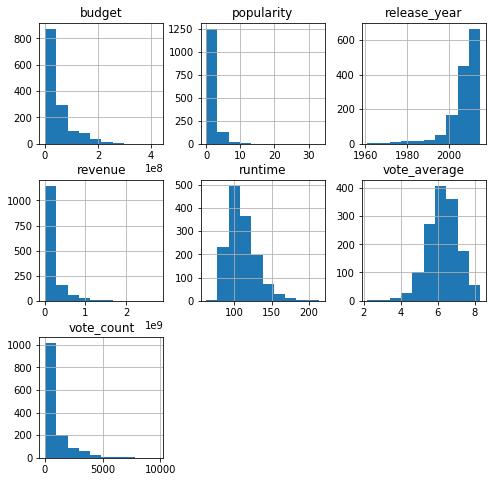

In [15]:
# Histogram for each column in df DataFrame.
df.hist(figsize = (8, 8));

### Observation
>There is a direct relation between budget, revenue, popularity, and vote_count.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the relation between the budget and profit?)

In [16]:
# Creating df_calc DataFrame by selecting all columns between budget and revenue (inclusive).
df_calc = df.loc[:, 'budget' : 'revenue']

>Created df_calc DataFrame by selecting all columns between budget and revenue (inclusive).

In [17]:
# Query the budget column of the 'df_calc' DataFrame with the boolean expression 'budget > 2.752938e+07'.
df_calc = df_calc.query('budget > 2.752938e+07')

>Queried the budget column of the 'df_calc' DataFrame with the boolean expression 'budget > 2.752938e+07' and assigned it to df_calc DataFrame.

In [18]:
# Calculating and appending 'profit' column to the 'df_calc' DataFrame.
df_calc['profit'] = df['revenue'] - df['budget'] 
df_calc['original_title'] = df['original_title']
df_calc.head()

,budget,revenue,profit,original_title
0,150000000.0,1.513529e+09,1.363529e+09,Jurassic World
1,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road
2,110000000.0,2.952382e+08,1.852382e+08,Insurgent
3,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens
4,190000000.0,1.506249e+09,1.316249e+09,Furious 7


>Calculated and appended the 'profit' column to the 'df_calc' DataFrame.

In [19]:
# Maximum 'profit' value, then show the DataFrame related to it (revenue, budget, and original_title)
profit = df_calc['profit'].idxmax()
high = lambda x: pd.DataFrame(df_calc.loc[x])
high(profit)

,1386
budget,2.37e+08
revenue,2.78151e+09
profit,2.54451e+09
original_title,Avatar


>Showing the DataFrame related to the Maximum 'profit' value (revenue, budget, and original_title)

In [20]:
# Maximum 'budget' value, then show the DataFrame related to it (revenue, profit, and original_title)
budget = df_calc['budget'].idxmax()
high(budget)

,2244
budget,4.25e+08
revenue,1.10876e+07
profit,-4.13912e+08
original_title,The Warrior's Way


>Showing the DataFrame related to the Maximum 'budget' value (revenue, profit, and original_title)

In [21]:
# Limit the df_calc DataFrame to the highest 5 movies in profit.
df_calc.sort_values(by=['profit'], inplace=True, ascending=False)
df_calc = df_calc.head(5)
df_calc

,budget,revenue,profit,original_title
1386,237000000.0,2.781506e+09,2.544506e+09,Avatar
3,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens
5231,200000000.0,1.845034e+09,1.645034e+09,Titanic
0,150000000.0,1.513529e+09,1.363529e+09,Jurassic World
4,190000000.0,1.506249e+09,1.316249e+09,Furious 7


>Showing the df_calc DataFrame limited  to the highest 5 movies in profit.

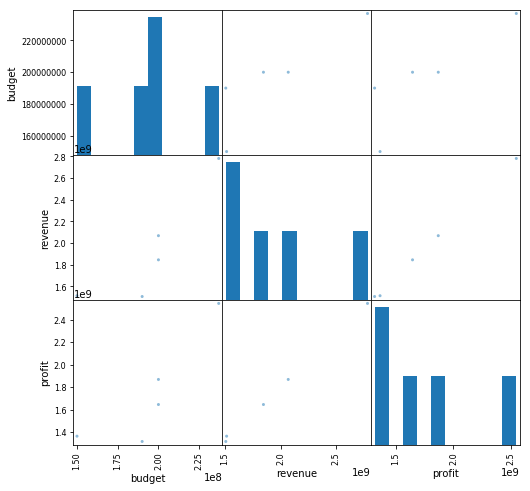

In [22]:
# Use scatter matrix (pairs plot) to compactly plots all the numeric variables we have in the 
# df_calc dataset against each other one.
pd.plotting.scatter_matrix(df_calc, figsize=(8, 8));

### Observation
>There is a direct relation between budget, revenue, and profit.

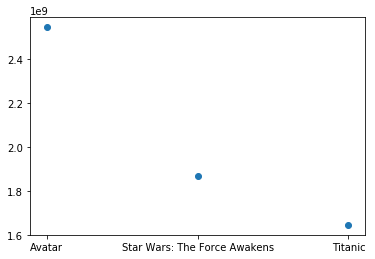

In [23]:
# Observe relationship between 'original_title' and 'profit'.
x = df_calc.original_title[0:3]
y = df_calc.profit[0:3]
plt.scatter(x, y);

> ### Ranking of movies based on highest profit
 <ol>
    <li>Avatar
        <li>Star Wars: The Force Awakens
            <li>Titanic
    </ol>

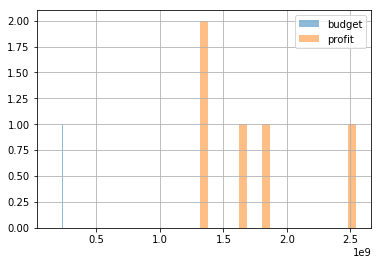

In [24]:
# Plotting a Histogram to show relation between budget and profit.
df_calc['budget'].hist(alpha=0.5, bins=20, label='budget')
df_calc['profit'].hist(alpha=0.5, bins=20, label='profit')
plt.legend();

### Observation
>There is a direct relation between budget and profit.

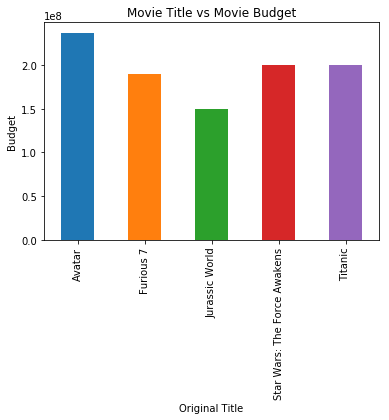

In [25]:
# Show a vertical bar plot of the df_calc DataFrame grouped by 'original_title'
# and return the mean of the 'budget' column.
df_calc.groupby('original_title').budget.mean().plot(kind='bar');
plt.title('Movie Title vs Movie Budget');
plt.xlabel('Original Title');
plt.ylabel('Budget');

> ### Ranking of movies based on highest budget
 <ol>
    <li>Avatar
        <li>Star Wars: The Force Awakens
            <li>Titanic
                <li>Furious 7
                    <li>Jurassic World
    </ol>

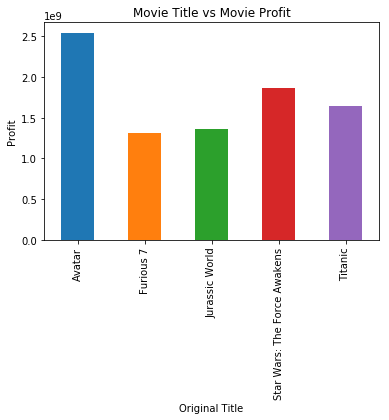

In [26]:
# Show a vertical bar plot of the df_calc DataFrame grouped by 'original_title'
# and return the mean of the 'profit' column.
df_calc.groupby('original_title').profit.mean().plot(kind='bar');
plt.title('Movie Title vs Movie Profit');
plt.xlabel('Original Title');
plt.ylabel('Profit');

> ### Ranking of movies based on highest profit
 <ol>
    <li>Avatar
        <li>Star Wars: The Force Awakens
            <li>Titanic
                <li>Jurassic World
                    <li>Furious 7
    </ol>

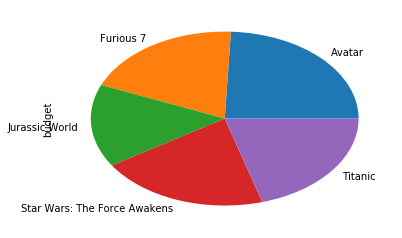

In [27]:
# Show a pie plot of the df_calc DataFrame grouped by 'original_title'
# and return the mean of the 'budget' column.
df_calc.groupby('original_title').budget.mean().plot(kind='pie');

> ### Ranking of movies based on highest budget
 <ol>
    <li>Avatar
        <li>Star Wars: The Force Awakens
            <li>Titanic
                <li>Furious 7
                    <li>Jurassic World
    </ol>

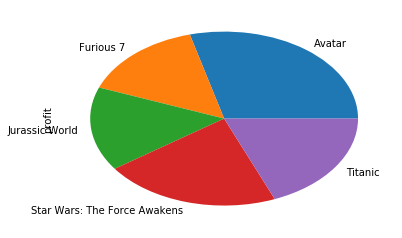

In [28]:
# Show a pie plot of the df_calc DataFrame grouped by 'original_title'
# and return the mean of the 'profit' column.
df_calc.groupby('original_title').profit.mean().plot(kind='pie');

> ### Ranking of movies based on highest profit
 <ol>
    <li>Avatar
        <li>Star Wars: The Force Awakens
            <li>Titanic
                <li>Jurassic World
                    <li>Furious 7
    </ol>

### Conclusions from previous data

 1. High budget leads to high profit.
 2. The higher the budget, the higher the profit potential.
 3. Although Furious 7 is higher in budget than Jurassic World, it is lower in profit.

### Research Question 2  (Which year has the highest/lowest movie release?)

In [29]:
# Group the data based on the release year, then count the number of movies 
# released using the movie original title.
release_count = df.groupby('release_year').count()['original_title']

# Assign the last 5 values to release_count which are the last 5 years.
release_count = release_count.tail()
release_count

release_year
2011    170
2012     95
2013     76
2014     75
2015    102
Name: original_title, dtype: int64

> ### Arrangement of years according to the number of movies released
 <ol>
    <li>2011
        <li>2015
            <li>2012
                <li>2013
                    <li>2014
    </ol>

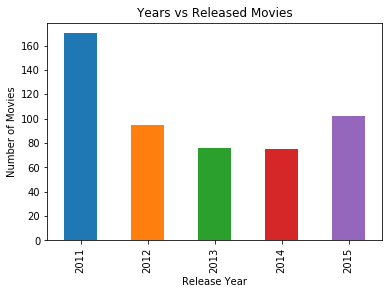

In [30]:
# Use query function to assign the last 5 years in the df DataFrame
# to the df_last DataFrame.
df_last = df.query('release_year > 2010')

# Show a vertical bar plot of the df_last DataFrame grouped by 'release_year'
# and return the count of the 'original_title' column representing the number
# of movies released. 
df_last.groupby('release_year').count()['original_title'].plot(kind='bar');
plt.title('Years vs Released Movies');
plt.xlabel('Release Year');
plt.ylabel('Number of Movies');

> ### Arrangement of years according to the number of movies released
 <ol>
    <li>2011
        <li>2015
            <li>2012
                <li>2013
                    <li>2014
    </ol>

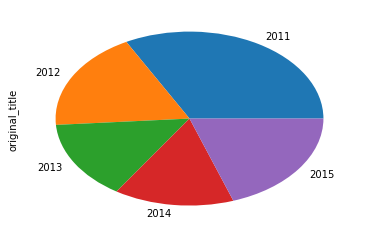

In [31]:
# Show a pie plot of the df_last DataFrame grouped by 'release_year'
# and return the count of the 'original_title' column representing the number
# of movies released. 
df_last.groupby('release_year').count()['original_title'].plot(kind='pie');

> ### Arrangement of years according to the number of movies released
 <ol>
    <li>2011
        <li>2015
            <li>2012
                <li>2013
                    <li>2014
    </ol>

Text(0,0.5,'Number of Movies')

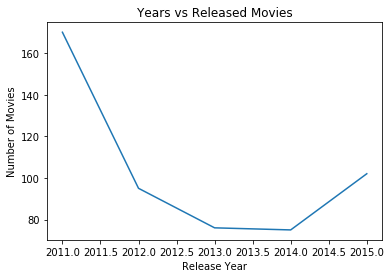

In [32]:
# Show a density plots of the df_last DataFrame grouped by 'release_year'
# and return the count of the 'original_title' column representing the number
# of movies released.
df_last.groupby('release_year').count()['original_title'].plot()
plt.title('Years vs Released Movies')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')

> ### Arrangement of years according to the number of movies released
 <ol>
    <li>2011
        <li>2015
            <li>2012
                <li>2013
                    <li>2014
    </ol>

## Conclusions from previous data

 1. 2011 is the highest year in movie releases.
 2. 2013 is the lowest year in movie releases.
 3. Between 2011 and 2015, there was a severe decrease in the number of released movies.

<a id='conclusions'></a>
# Conclusions
From the previous data analysis, I came out with this conclusions:
<ol>
    <li>High budget leads to high profit.
    <li>The higher the budget, the higher the profit potential.
    <li>Ranking of movies based on highest profit (Avatar, Star Wars: The Force Awakens, Titanic, Jurassic World, Furious 7)
    <li>Between 2011 and 2015, there was a severe decrease in the number of released movies.
    <li>Arrangement of years according to the number of movies released (2011, 2015, 2012, 2013, 2014)
 
</ol>

## Limitations
<ul>
    <li>In parsing the tmdb-movies dataset, the data is not up-to-date, it is also incomplete and has missing values.
    <li>The currency unit is not provided, so I assume it's the same unit, which can lead to a huge error in data analysis.
</ul>

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0